# 🪃 **Práctica 07: Regresión Logística** 📟
----

## <b>T</b><b>e</b><b>a</b><b>m</b>: <font color='red'><b>S</b></font><b>ocios</b> <font color='blue'><b>I</b></font><b>nteligentemente</b> <font color='green'><b>A</b></font><b>rtificiales</b> (<font color='red'><b>S</b></font>.<font color='blue'><b>I</b></font>.<font color='green'><b>A</b></font>)

<font color='yellow'>▼</font> **Araujo Chávez Mauricio**

<font color='blue'>♥</font> **Bonilla Reyes Dafne**

<font color='red'>♦</font> **Castañón Maldonado Carlos Emilio**

<span style="color:#3498DB">❖</span> **Clemente Herrera Karla**

<font color='purple'>♠</font> **Mares Cruz Tlacaelel Horacio**

<font color='green'>♣</font> **Navarro Santana Pablo César**

In [1]:
# En caso de no tener instalado lo anterior, instalar con:
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install -U scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn as sk
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

%matplotlib inline

### **Cargamos los datos**

In [2]:
path = './data/cd_Abandono_Escolar_CONALEP_2023.csv'

### **Leemos los datos del CSV**

In [3]:
# Leemos el archivo
pd.read_csv(path, encoding='latin-1')

,cve_ent,entidad,cve_plantel,plantel,periodo_anual,Porcentaje_de_abandono_escolar
0,1.0,Aguascalientes,63.0,Aguascalientes II,2022-2023,8.5
1,1.0,Aguascalientes,284.0,Aguascalientes III,2022-2023,13.9
2,1.0,Aguascalientes,318.0,Aguascalientes IV,2022-2023,9.1
3,1.0,Aguascalientes,247.0,Ing. Miguel Ángel Barberena Vega,2022-2023,9.1
4,1.0,Aguascalientes,319.0,Pabellon de Arteaga,2022-2023,12.6
...,...,...,...,...,...,...
310,32.0,Zacatecas,137.0,Fresnillo,2022-2023,23.2
311,32.0,Zacatecas,136.0,Maestra Dolores Castro Varela,2022-2023,14.3
312,32.0,Zacatecas,326.0,Mazapil,2022-2023,21.0
313,NaN,NaN,NaN,NaN,NaN,NaN


### **Creamos un Data Frame del CSV**

In [4]:
escolar_DataFrame = pd.read_csv(path, encoding='latin-1')

### **Obtenemos los tipos de Datos del CSV**

In [5]:
escolar_DataFrame.dtypes

cve_ent                           float64
entidad                            object
cve_plantel                       float64
plantel                            object
periodo_anual                      object
Porcentaje_de_abandono_escolar    float64
dtype: object

### **Visualizamos las columnas del CSV**

In [6]:
escolar_DataFrame.columns

Index(['cve_ent', 'entidad', 'cve_plantel', 'plantel', 'periodo_anual',
       'Porcentaje_de_abandono_escolar'],
      dtype='object')

### **Ejemplo de la obtencion de Datos de alguna de las columnas del CSV**

In [7]:
# Probamos nuestro ejemplo con la columna 'entidad'
pd.unique(escolar_DataFrame['entidad'])

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México',
       'Coahuila de Zaragoza', 'Colima', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro de Arteaga', 'Quintana Roo', 'San Luis Potosí',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz Llave', 'Yucatán', 'Zacatecas', nan, 'CONALEP'],
      dtype=object)

In [8]:
# Probamos otro ejemplo con la columna 'Porcentaje_de_abandono_escolar'
pd.unique(escolar_DataFrame['Porcentaje_de_abandono_escolar'])

array([ 8.5, 13.9,  9.1, 12.6, 17.6, 10. , 20.2, 22.6, 19. , 20. , 12.5,
       18.7, 20.5,  8.6, 18.8, 11.4, 17.5, 12.2, 15.6, 12.8, 18.9, 10.9,
       30.9, 16.2, 23.1, 20.9, 25.4, 29.2, 17.4, 31.7, 20.1, 15. , 19.9,
       21.1, 17. , 23. , 32.3, 23.3, 28.4, 25.3, 36.9, 27.8, 37.4, 24. ,
       30.6, 19.7, 18.3, 25.6, 21.3, 29.9, 19.6, 25.9, 28.7, 21.6, 27.4,
        7.3,  7.1,  9.5,  8.3,  5.3, 10.6,  7.5, 14.5,  8.7, 15.1, 24.9,
       26.5, 31.4, 11.9, 15.3, 14.7,  9.4, 12.1,  9.9,  7.7, 13.8, 16.6,
       10.7, 13.5, 13.6, 12.7, 11.2, 11.8, 13.3, 10.2, 14.2, 24.6, 16.5,
       20.3, 15.7, 29.7,  8.4, 14. , 11.5, 11.7, 13. ,  9.2, 19.2, 10.3,
        6.9,  7.2,  7.9, 11.1, 11. ,  9.8, 10.1, 12.9, 10.4,  9.3,  5.2,
        4.8, 10.8,  5.4, 18.2,  7. ,  7.4, 13.7,  9.7,  6.3, 14.6, 17.2,
       22.8, 23.2, 15.8, 21.9, 18.6, 15.9, 17.8, 15.2, 22.4, 20.7, 18.4,
       14.4,  8.8, 14.3, 22.1, 16.9,  4.2, 14.9,  4.5,  6.6, 16. ,  6.5,
        8. , 19.3, 13.4,  8.9,  3.6, 10.5, 14.1, 25

### **Visualizamos el numero de planteles de Conalep en cada entidad**

In [9]:
escolar_DataFrame['entidad'].value_counts()

entidad
México                  39
Ciudad de México        27
Nuevo León              18
Jalisco                 18
Sinaloa                 16
Guanajuato              16
Veracruz Llave          15
Sonora                  14
Michoacán de Ocampo     13
Chiapas                 12
Guerrero                10
Puebla                  10
Coahuila de Zaragoza     9
Chihuahua                8
Tamaulipas               8
Quintana Roo             8
Aguascalientes           7
Tabasco                  7
Baja California          6
Hidalgo                  6
Yucatán                  5
San Luis Potosí          5
Morelos                  5
Querétaro de Arteaga     5
Oaxaca                   5
Nayarit                  4
Durango                  3
Colima                   3
Tlaxcala                 3
Campeche                 3
Zacatecas                3
Baja California Sur      2
CONALEP                  1
Name: count, dtype: int64

### **Obtenemos mas informacion con describe**

In [10]:
escolar_DataFrame['entidad'].describe()

count        314
unique        33
top       México
freq          39
Name: entidad, dtype: object

## **Visualización y análisis de datos**

Text(0, 0.5, 'Porcentaje de Abandono Escolar')

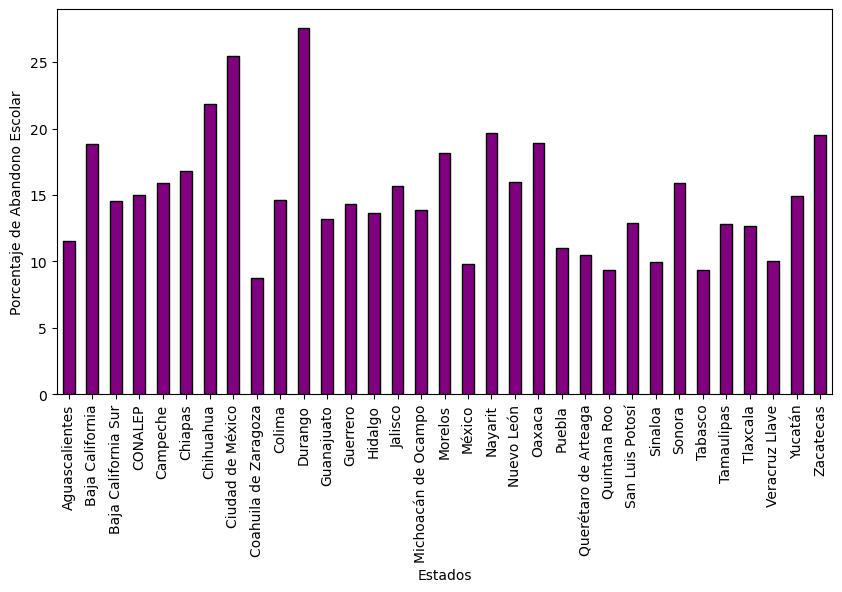

In [11]:
# obtiene el porcentaje de abandono por estado 
porcentaje_por_estado = escolar_DataFrame.groupby('entidad')['Porcentaje_de_abandono_escolar'].mean()

# grafica con Matplotlib
porcentaje_por_estado.plot(kind='bar', figsize=(10, 5), color='purple', edgecolor='black') #cambien colores si gustan :O

# añade los titulos en la grafica
plt.xlabel('Estados')
plt.ylabel('Porcentaje de Abandono Escolar')

### **Visualizamos las entidades y su indice de abandono**

<Axes: xlabel='entidad', ylabel='Indice de Abandono'>

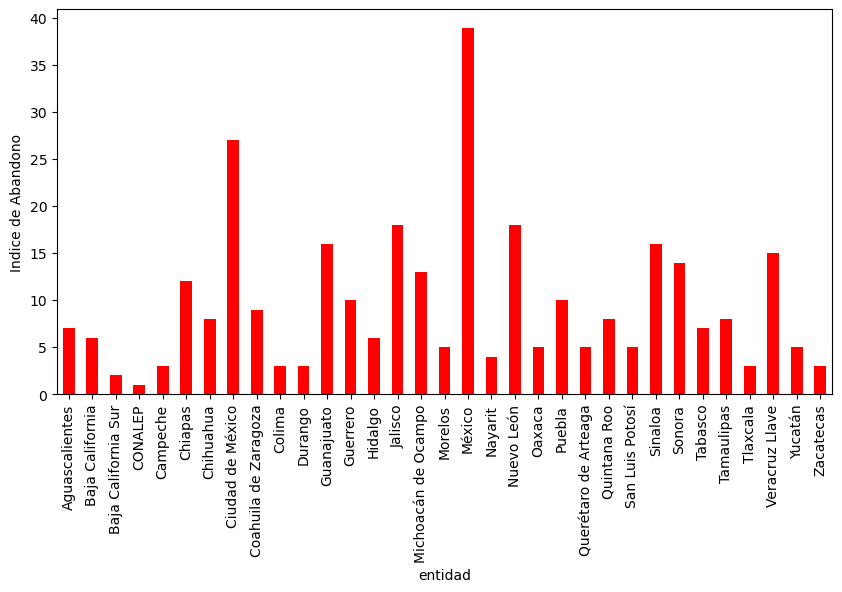

In [12]:
# Contamos el indice de abandono escolar por entidad
conteo_Entidades_IndiceA = escolar_DataFrame.groupby('entidad')['Porcentaje_de_abandono_escolar'].count() 

# Graficamos Usando Matplotlib
conteo_Entidades_IndiceA.plot(kind='bar', figsize=(10, 5), color='red', ylabel='Indice de Abandono' ) 

### **Agrupamiento de Datos**

In [14]:
# Agrupamos los datos, primero por entidad y luego por plantel, calculando el promedio de abondono escolar por entidad.
#conteo_Entidades_IndiceA = escolar_DataFrame.groupby(['entidad', 'plantel'])['Porcentaje_de_abandono_escolar'].mean()

# Graficamos Usando Matplotlib
#conteo_Entidades_IndiceA.plot(kind='bar', figsize=(10, 5), color='blue', ylabel='Indice de Abandono' )

### **Visualizacion de el abandono escolar**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Aguascalientes'),
  Text(1, 0, 'Baja California'),
  Text(2, 0, 'Baja California Sur'),
  Text(3, 0, 'Campeche'),
  Text(4, 0, 'Chiapas'),
  Text(5, 0, 'Chihuahua'),
  Text(6, 0, 'Ciudad de México'),
  Text(7, 0, 'Coahuila de Zaragoza'),
  Text(8, 0, 'Colima'),
  Text(9, 0, 'Durango'),
  Text(10, 0, 'Guanajuato'),
  Text(11, 0, 'Guerrero'),
  Text(12, 0, 'Hidalgo'),
  Text(13, 0, 'Jalisco'),
  Text(14, 0, 'México'),
  Text(15, 0, 'Michoacán de Ocampo'),
  Text(16, 0, 'Morelos'),
  Text(17, 0, 'Nayarit'),
  Text(18, 0, 'Nuevo León'),
  Text(19, 0, 'Oaxaca'),
  Text(20, 0, 'Puebla'),
  Text(21, 0, 'Querétaro de Arteaga'),
  Text(22, 0, 'Quintana Roo'),
  Text(23, 0, 'San Luis Potosí'),
  Text(24, 0, 'Sinaloa'),
  Text(25, 0, 'Sonora'),
  Text(26, 0, 'Tabasco'),
  Text(27, 0, 'Tamaulipas'),
  Text(28, 0, 'Tlaxcala'),
  Text(29,

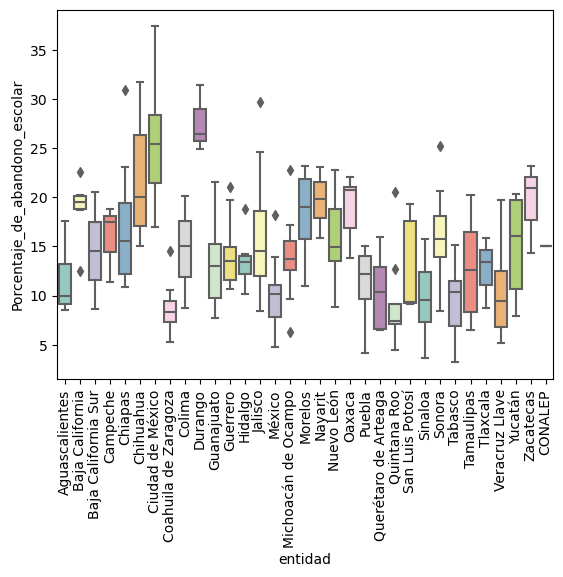

In [13]:
sns.boxplot(x='entidad', y='Porcentaje_de_abandono_escolar', data=escolar_DataFrame, palette='Set3')

# Imprimimos en vertical y no en horizontal las etiquetas de las entidades
plt.xticks(rotation=90)


#conteo_Entidades_IndiceA = escolar_DataFrame.groupby('entidad')['Porcentaje_de_abandono_escolar'].mean()
#conteo_Entidades_IndiceA.plot(kind='bar', figsize=(10, 5), color='blue', ylabel='Indice de Abandono' )


### **Gráficas de estados con variabilidad en el promedio de abandono escolar**

#### **Baja California Sur**

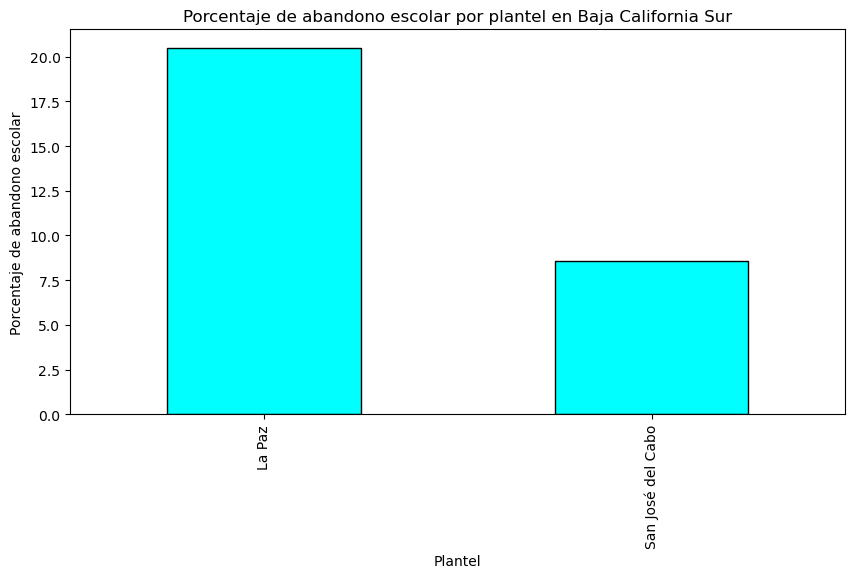

In [14]:
planteles_california = escolar_DataFrame[escolar_DataFrame['entidad'] == 'Baja California Sur']
num_planteles_california = planteles_california.groupby('plantel')['Porcentaje_de_abandono_escolar'].mean()

num_planteles_california.plot(kind='bar', figsize=(10, 5), color='cyan', edgecolor='black')
plt.xlabel('Plantel')
plt.ylabel('Porcentaje de abandono escolar')
plt.title('Porcentaje de abandono escolar por plantel en Baja California Sur')
plt.show()


#### **Chihuahua**

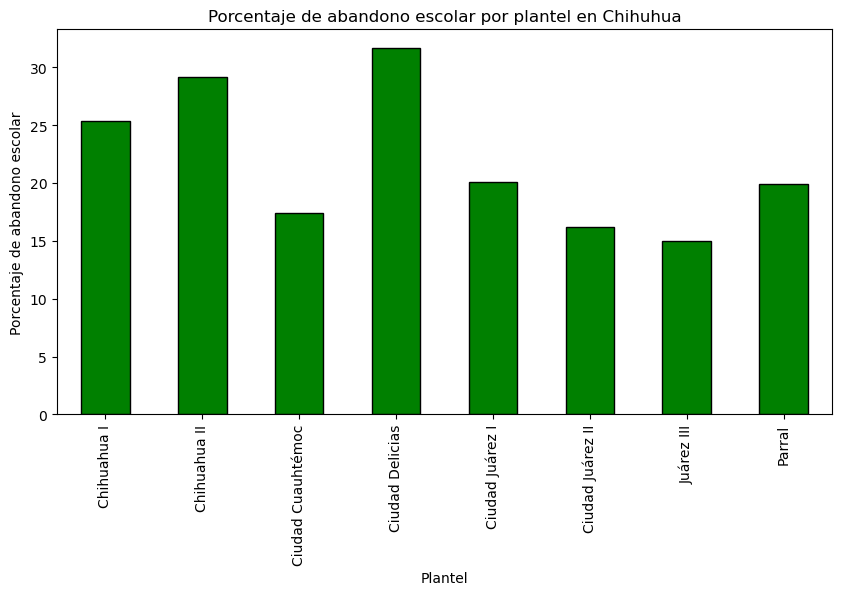

In [15]:
planteles_chihuahua = escolar_DataFrame[escolar_DataFrame['entidad'] == 'Chihuahua']
num_planteles_chihuahua = planteles_chihuahua.groupby('plantel')['Porcentaje_de_abandono_escolar'].mean()

num_planteles_chihuahua.plot(kind='bar', figsize=(10, 5), color='green', edgecolor='black')
plt.xlabel('Plantel')
plt.ylabel('Porcentaje de abandono escolar')
plt.title('Porcentaje de abandono escolar por plantel en Chihuhua')
plt.show()

#### **Chiapas**

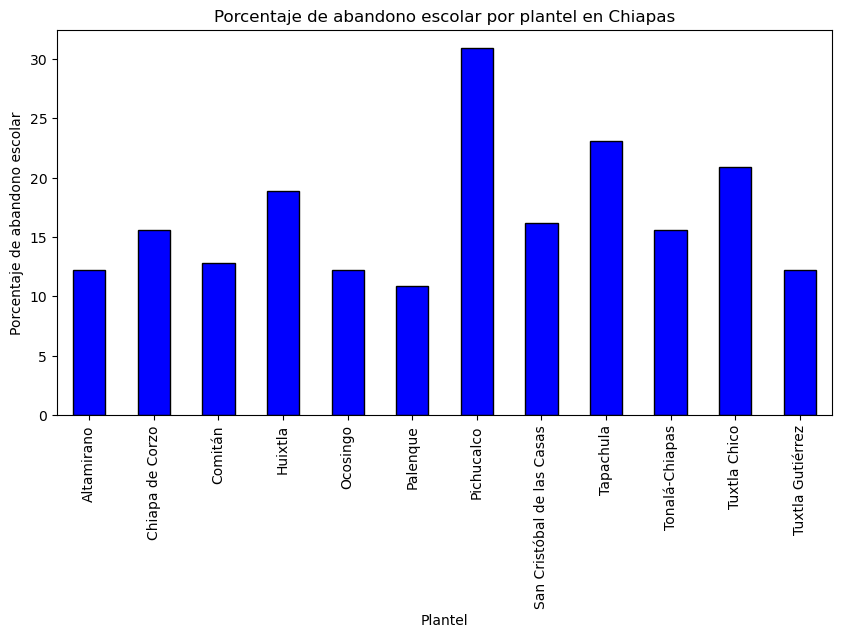

In [16]:
planteles_chiapas = escolar_DataFrame[escolar_DataFrame['entidad'] == 'Chiapas']
num_planteles_chiapas = planteles_chiapas.groupby('plantel')['Porcentaje_de_abandono_escolar'].mean()

num_planteles_chiapas.plot(kind='bar', figsize=(10, 5), color='blue', edgecolor='black')
plt.xlabel('Plantel')
plt.ylabel('Porcentaje de abandono escolar')
plt.title('Porcentaje de abandono escolar por plantel en Chiapas')
plt.show()

### Análisis de resultados 

_Hint: El patrón es que las ciudades más pobladas son las que tienen mayor deserción_

<font color='yellow'>▼</font> **Araujo Chávez Mauricio**

En los gráficos anteriores podemos observar que dichos estados tiene índices de deserción escolar muy contrastantes entre sus plantes, si bien el abandono escolar es una situación constante en todos los estados e instituciones educativas podemos realizar conclusiones con los datos obtenidos de esta práctica:
- Está claro que en el estado de Baja California Sur hay una gran variabilidad en el índice de abandono escolar, pues únicamente tiene dos planteles en todo el estado lo cuál hace que contraste mucho los resultados, aunado a esto podemos notar que la ciudad de La Paz es más poblada que San José del Cabo, lo cual nos lleva al punto siguiente.
- El índice de deserción escolar está estrechamente relacionado con el número de alumnos matriculados en la institución, de tal manera que, entre mayor población de estudiantes haya los índices de deserción pueden disparse notablemente. Retomando el punto anterior, es por ello que La Paz contiene un mayor índice, sin embargo, dicha conclusión es más visible en ciudades grandes con mayor número de planteles, como Chihuhua y Chiapas, donde podemos observar el mismo patrón, las ciudades con mayor índice de deserción son aquellas que tienen una mayor población y por ende podemos inferir un mayor número de alumnos matriculados en cada institución.

<font color='blue'>♥</font> **Bonilla Reyes Dafne**

Notemos como es que por medio de las graficas anteriores hemos podido observar como es que el indice de abandono escolar
en los estados de la república mexicana varia de manera considerable, sin embargo, algo que podemos observar (y que no esta
implicito en los datos del CSV) es que los estados con mayor poblacion tienden a tener mas planteles de Conalep para satisfacer la demanda de
educacion media superior del estado en el que estamos trabajando y que probablemente por esta misma razon el indice de abandono escolar es alto en entidades como la Ciudad de Mexico o Chiapas en donde como son tantos planteles (y tenemos tanta poblacion) debe ser mas dificil administrarlos a los anteriores ademas de que tambien debe ser mas dificil brindar soporte a todos sus alumnos, esto aunado a que las dos antes mencionadas son muy suceptibles a factores como la inseguridad, tenemos como resultado que estos tienen indices altos de desercion, contrario a estados donde no hay tanta demanda poblacional (y por ende planteles) como Baja California Sur en donde el indice de abandono escolar es moderado tendiendo a bajo pero por
que solo existen dos planteles en esta entidad.

<font color='red'>♦</font> **Castañón Maldonado Carlos Emilio**

Como hemos podido observar en las graficas anteriores, uno de los principales factores para que un estado de la
república mexicana tenga un alto índice de abandono escolar es el de tener varios planteles en esta entidad
notemos como es que en Baja California Sur que es un estado con dos planteles tiene un indice de abandono escolar
*moderado* (ni muy alto pero tampoco bajo) en comparacion con Chiapas, el cual tiene doce planteles y en la grafica 
podemos notar como es que si bien por momentos pareciera que el indice de abandono escolar es similar al de Baja California Sur,
hay planteles como el de San Cristobal de las Casas, Tapachula o el Tuxtla Chico en donde el abandono escolar se dispara a niveles mas altos.


<span style="color:#3498DB">❖</span> **Clemente Herrera Karla**

Con base en las gráficas anteriores se puede observar que los estados con mayor índice de deserción escolar son aquellos que tienen más planteles de Conalep. Por lo tanto, podríamos concluir con estos datos que el índice de deserción escolar está correlacionado con el número de planteles, con esto podemos inferir que en la deserción escolar se encuentran influyendo factores sociales y de población, entre ellos podemos mencionar que el financiamiento de las escuelas se vea afectado con el número de planteles y se requiera una mayor complejidad administrativa.


<font color='purple'>♠</font> **Mares Cruz Tlacaelel Horacio**

observando la inforacion obtenida de las tablas, pese a que se nota una desercion grande es lugares con mayor poblacion, esto no quiere decir que dichos planteles sean malos
o que esten mal administrados, al contrario pues si analizamos mas aprofundidad los resultados en tablas comparados a las poblaciones y el numero de planteles que hay por estados
puede llegar a ser normal o promediable el numero de abandono pues en estados que tengan mas poblacion por obvias razones en este caso, tendran un indice mas alto
siendo un poco comparables los resultados entre si. Lo unico que sera a analizar mas a porfundidad es el mismo abandono, si volvemos a comparar el abandono, los planteles y la poblacion
es demasiada desercion de estudiantes, esto puede crear un analfabetismo un poco grande y mas en ciudades menos pobladas pues son quienes tienden a vivir de una manera se-cooperativa.

<font color='green'>♣</font> **Navarro Santana Pablo César**

Podemos ver claramente que si en un estado hay mas planteles, por lo tanto hay mas alumnos y por lo tanto hay mas desercion, lo cual es normal al final
del día, ya quecon un mayor numero de alumnos, es mas probable que haya mas alumnos que deserten, lo mismo para al revés, si hay muy pocos planteles,
entonces los datos que se obtengan, van a influir en la deserción total de ese estado, por lo tanto, los datos mas importantes para nosotros, serían
los estados donde hayan mas planteles, de tal forma que podemos ver que el Estado de México, es uno de los estados con mayor deserción de tal forma que su cantidad de alumnos es grande y su deserción realmente si es considerable, llegando a tener alrededor de 25% de deserción.
Esto es preocupante, y se debe a muchos factores nacionales los cuales son la falta de oportunidades, la mala educación, el tener caminos mas faciles
para prosperar aunque sean ilegales o el escaso apoyo a los jovenes

### Creación del modelo de regresión logística y ejecución

Predicciones:  ['alto' 'alto' 'bajo' 'bajo' 'alto' 'alto' 'alto' 'alto' 'alto' 'alto'
 'bajo' 'alto' 'alto' 'alto' 'alto' 'bajo' 'bajo' 'bajo' 'alto' 'alto'
 'bajo' 'bajo' 'bajo' 'bajo' 'bajo' 'alto' 'bajo' 'alto' 'alto' 'alto'
 'alto' 'alto' 'bajo' 'alto' 'alto' 'bajo' 'bajo' 'alto' 'alto' 'bajo'
 'alto' 'alto' 'alto' 'alto' 'alto' 'bajo' 'bajo' 'alto' 'alto' 'alto'
 'bajo' 'alto' 'alto' 'alto' 'alto' 'bajo' 'alto' 'alto' 'alto' 'alto'
 'alto' 'bajo' 'alto']
Valores reales:  ['bajo', 'bajo', 'alto', 'bajo', 'bajo', 'alto', 'bajo', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'bajo', 'bajo', 'bajo', 'alto', 'bajo', 'bajo', 'bajo', 'bajo', 'bajo', 'bajo', 'alto', 'alto', 'bajo', 'alto', 'bajo', 'alto', 'bajo', 'alto', 'alto', 'bajo', 'bajo', 'alto', 'bajo', 'alto', 'alto', 'bajo', 'alto', 'bajo', 'bajo', 'bajo', 'bajo', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'bajo', 'bajo', 'alto', 'alto', 'bajo', 'bajo', 'bajo', 'alto']
F1 Score:  0.5

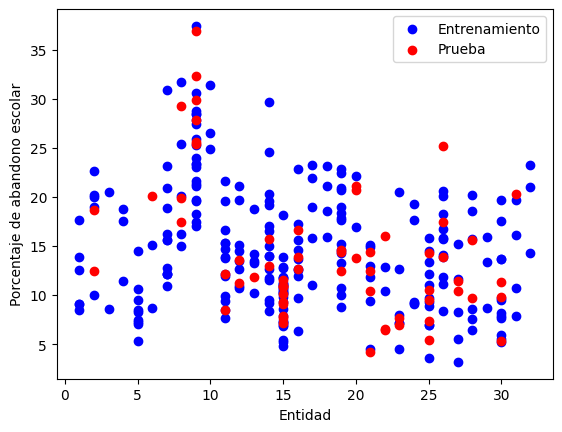

Matriz de confusion: 
[[21  8]
 [21 13]]
Precision:  0.5396825396825397


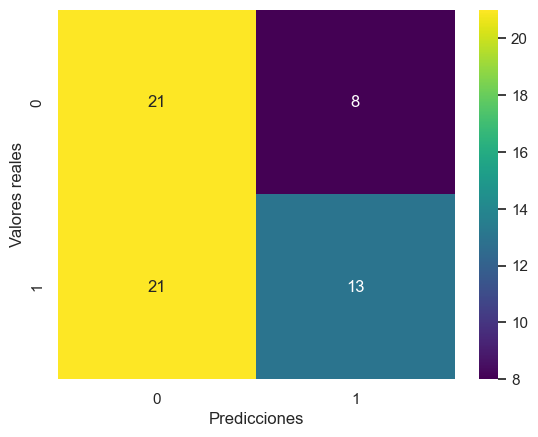

(array([[21,  8],
        [21, 13]], dtype=int64),
 0.5396825396825397)

In [19]:
def read_data(path):
    '''
    Funcion para leer los datos, obtener su formato correcto y dividirlos en entrenamiento y prueba.
    '''
    # Leemos el archivo
    data = pd.read_csv(path, encoding='latin-1')
    
    # Normalizamos los datos
    # data = (data - data.mean()) / data.std()

    # Eliminamos las filas que tangan valores nulos
    data = data.dropna()

    # Dividimos los datos en entrenamiento y prueba
    # train_data, test_data = train_test_split(data, test_size=0.2)
    train_data, test_data = train_test_split(data, test_size=0.2) 
    return train_data, test_data

'''
def train_model(train_data):
    # Definimos las variables independientes 		
    # X = train_data[['entidad', 'plantel', 'periodo_anual']]
    X = train_data[['cve_ent', 'cve_plantel']]
    # Definimos la variable dependiente
    y = train_data['Porcentaje_de_abandono_escolar']
    # Creamos una instancia del modelo de regresion logistica
    model = sk.linear_model.LinearRegression()
    # Entrenamos el modelo 
    model.fit(X, y)
    return model
'''

def train_model(train_data, epochs):
    X = train_data[['cve_ent', 'cve_plantel']]
    y = train_data['Porcentaje_de_abandono_escolar']
    y = ['alto' if i >= 13 else 'bajo' for i in y]  

    model = sk.linear_model.LogisticRegression(max_iter=epochs)
    model.fit(X, y)

    """
    precisiones = []  
    #precisiones2 = []
    for epoch in range(epochs):
        # Calcular y guardar la precisión actual
        model.fit(X, y)
        y_pred = model.predict(X)
        #y_pred2 = model.predict_proba(X)

        precision = sk.metrics.accuracy_score(y, y_pred)
        #precision2 = sk.metrics.accuracy_score(y, y_pred)
        precisiones.append(precision)
        #precisiones2.append(precision2)

    plt.plot(range(1, epochs + 1), precisiones, marker='o', color='blue')
    #plt.plot(range(1, epochs + 1), precisiones2, marker='o', color='red')
    plt.xlabel('Epocas')
    plt.ylabel('Precision')
    plt.title('Entrenamiento del modelo de Regresion Logistica')

    plt.show()
    """

    return model


'''
def evaluate_model(model, test_data):

    # Definimos las variables independientes
    #X = test_data[['entidad', 'plantel', 'periodo_anual']]
    X = train_data[['cve_ent', 'cve_plantel']]
    # Definimos la variable dependiente
    y = test_data['Porcentaje_de_abandono_escolar']
    # Realizamos predicciones sobre el conjunto de prueba
    y_pred = model.predict(X)
    # Revisamos las predicciones y comparamoslas con los valores reales
    print('Predicciones: ', y_pred)
    print('Valores reales: ', y)

    return y_pred, y
'''

def evaluate_model(model, test_data):
    '''
    Funcion para evaluar el modelo de regresion logistica.
    '''
    # Definimos las variables independientes
    X = test_data[['cve_ent', 'cve_plantel']]

    # Definimos la variable dependiente
    y = test_data['Porcentaje_de_abandono_escolar']
    y = ['alto' if i >= 13 else 'bajo' for i in y]  
    
    y_pred = model.predict(X)
    # Revisamos las predicciones y comparamoslas con los valores reales
    print('Predicciones: ', y_pred)
    print('Valores reales: ', y)

    print('F1 Score: ', f1_score(y, y_pred, average='weighted'))

    return y_pred, y

def plot_data(train_data, test_data):
    '''
    Funcion para graficar los datos.
    '''
    # Graficamos los datos de entrenamiento
    plt.scatter(train_data['cve_ent'], train_data['Porcentaje_de_abandono_escolar'], color='blue', label='Entrenamiento')
    # Graficamos los datos de prueba
    plt.scatter(test_data['cve_ent'], test_data['Porcentaje_de_abandono_escolar'], color='red', label='Prueba')
    plt.xlabel('Entidad')
    plt.ylabel('Porcentaje de abandono escolar')
    plt.legend()
    plt.show()

def confusion_Matrix(y_pred, y):
    '''
    Funcion para calcular la matriz de confusion.
    '''
    # Calculamos la matriz de confusion
    cm = sk.metrics.confusion_matrix(y, y_pred)
    print('Matriz de confusion: ')
    print(cm)

    # Calculamos la precision del modelo
    accuracy = sk.metrics.accuracy_score(y, y_pred)
    print('Precision: ', accuracy)

    # Calculamos la matriz de confusion y la graficamos
    #cm = sk.metrics.confusion_matrix(y, y_pred)
    #plt.figure(figsize=(5, 5))
    sns.set_theme(font_scale=1, palette='viridis', style='whitegrid'  )
    sns.heatmap(cm, annot=True ,cmap='viridis')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.show()

    return cm, accuracy

train_data, test_data = read_data('./data/cd_Abandono_Escolar_CONALEP_2023.csv')
model = train_model(train_data, 1000)

y_pred, y = evaluate_model(model, test_data)

# Revisamos los coeficientes de las variables
print('Coeficientes: ', model.coef_)
print('Intercepto: ', model.intercept_)



plot_data(train_data, test_data)

confusion_Matrix(y_pred, y)


### Análisis de resultados 

_Hint: Las conclusiones están relacionadas a que el modelo tiene un mal rendimiento debido a la poca cantidad de datos con la cual es entrenado. 

Se necesitan más para obtener mejores resultados_

$$ \sigma (x) = \frac{1}{1+e^{-x}}$$

<font color='yellow'>▼</font> **Araujo Chávez Mauricio**

Justifiquemos la precisión del modelo, que si bien supera el 50% de precisión, no es posible obtener un mejor resultado debido a la cantidad de datos con la que estamos trabajando (315 filas), además de ese total un 80% son datos de entrenamiento y 20% de prueba lo que reduce aún más los datos en el proceso de aprendizaje del modelo. Esto causa un infrajuste del modelo dando como resultado predicciones muy malas, aunque algunas buenas, no es suficiente para aseverar que el modelo cumple su propósito de una manera aceptable. Este problema podría solucionarse extendiendo los datos hacia índices de deserción de otras instituciones de eduación nivel medio superior o, en su defecto, tomando las estadísticas de ciclos escolar anteriores pues sólo se toma el periodo 2022-2023, ya que en esta ocasión los hiperparámetros no influyen en una mejora del modelo. En resumen, un mejor dataset podría hacer que el modelo de regresión logística obtenga un mejor resultado.

<font color='blue'>♥</font> **Bonilla Reyes Dafne**

Observemos como es que como estamos trabajando con un modelo de regresion logistica, vamos a estar limitados por la sigmoide que usa de base, 
la cual esta dada por $ \sigma (x) = \frac{1}{1+e^{-x}}$ y que si bien es continua y **derivable derivable** vamos a estar condicionados por este
umbral en el que la sigmoide converge a 1 cuando $x\to \infty$ y a 0 cuando $x\to -\infty$, teniendo de esta forma que vamos a estar limitados en poner de un lado del umbral a un conjunto de datos y en el otro lado del umbral, al otro grupo de datos, los cuales en nuestro modelo fueron que
si el indice de abandono escolar es mayor o igual a 13, entonces el abandono escolar de el plantel en cuestion será alto y si por el contrario
es menor o igual 13 su indice sera bajo, lo cual puede llegar a ser inexacto ya que estamos clasificando a los datos en el umbral segun un criterio que hemos puesto (la media de los porcentajes de abandono, por eso el 13) y realmente el predecir si un plantel tendra un alto o bajo porcentaje de
abandono escolar se queda en eso, nada mas una prediccion por que solo estamos clasificando datos en dos grupos y entrenando a un modelo para que sepa en que grupo clasificar a los datos, sin embargo, no estamos prediciendo nada en concreto, ya que datos como el numero de habitantes de la entidad, indices de inseguridad, calidad de la enseñanza, pobreza en la entidad, etc. no estan siendo tomados en cuenta en nuestro modelo para poder realizar una prediccion mas exacta (ademas de que el uso de la regresion logistica nos limita un poco).

<font color='red'>♦</font> **Castañón Maldonado Carlos Emilio**

Notemos como es que debido a que nuestro conjunto de datos es pequeño, el modelo de regresion logistica (sigmoide) no es capaz de predecir de manera correcta el abandono escolar en los planteles de Conalep, esto se debe a que el modelo no tiene suficientes datos para entrenarse y por ende no dispone tampoco de la cantidad suficiente de datos para validar si realmente se entreno bien o no, esto se puede observar mas a profundidad en la grafica de la matriz de confusion, ya que si bien tenemos bastantes datos predichos de forma correcta en la diagonal, tambien tenemos muchos datos que fueron predichos de forma incorrecta, sin embargo, aunque hemos tenido estos resultados, debemos decir que en la grafica de porcentaje de abandono escolar - entidad, podemos observar como es que el modelo de regresion logistica si bien no es perfecto este se acerca bastante con los datos de prueba a los que tenemos como datos de entrenamiento.

<span style="color:#3498DB">❖</span> **Clemente Herrera Karla**

Debido al tamaño reducido del conjunto de datos y al hecho de que el modelo solo fue entrenado con el 80% de este conjunto, lo cual limita aún más la cantidad de datos disponibles para su entrenamiento, el modelo de regresión logística no es capaz de predecir con precisión la deserción escolar. Esta limitación se refleja en la matriz de confusión, donde se observan números altos en las diagonales, lo cual representa los errores cometidos por el modelo. Aunque la precisión del modelo es aceptable, podría mejorarse significativamente con un conjunto de datos más amplio que incluya información de otros periodos anuales, de más escuelas que hay en cada estado, información socioeconómica de los estudiantes, condiciones de las escuelas. La inclusión de datos de un censo en el modelo podría mejorar aún más su precisión.

<font color='purple'>♠</font> **Mares Cruz Tlacaelel Horacio**

Observamos algunas fallas en el momento en el que se calculan las deserciones, obteniendo datos un poco confusos y semi-incorrectos, pudimos analizar y observar que esto se pudo tratar de la regresion logistica usada ya que una desventaja de la sigmoide es que cuando los valores de entrada son muy grandes o muy pequeños(nuestro caso) tiende a obtener resultados cercanos a cero (recordando que la función logistica mapea los valores de entrada en un rango entre 0 y 1 donde la salida es directamente la "interpretacion" de la probabilidad de pertenencia a una clase)o en otras palabras confusos. Otro punto a tomar es que al tener buenos datos pero a la vez relativamente pocos en terminos de variedad ya que la desercion tiene muchas causas de su existencia, es un poco mas complejo el poder predecir un resultado aun mucho mas acertado a lo que estamos buscando o esperabamos obtener ya que al tener una interpretacion intuitiva es una ventaja pero a su vez una desventaja en algunos casos como los que tenemos, donde los datos son un poco escasos y carentes de variacion o de mas informacion para que se logren obtener datos mas precisos. lados positivos fue que despues de entender este "fallo" y hacer un chequeo mas preciso, notamos que el resultado obtendido realmente es muy satisfactorio pues su prediccion es casi certera a el verdadero analisis hecho un poco mas meticuloso. 

<font color='green'>♣</font> **Navarro Santana Pablo César**

A causa de una mayor cantidad de datos, podemos notar que el modelo justamente nos arroja que tiene un %50 de presición, lo cual en si, nos advierte
que los datos obtenidos, no son de tanta confianza, debido a que este puede tener muchos falsos positivos y por lo tanto, no nos puede servir mucho
Para poder corregir esto, se deberían obtener muchos mas datos, para aumentar la presición del modelo y así poder tener datos mas fidedignos y así
tener mejores conclusiones con respecto al tema de deserciones, ya que si tomamos estos datos tal como estan, esto pueda causar que se esparsa 
información falsa y que pueda llegar a afectar a terceros. (Lo cual ya hay varios casos documentados donde un estudio, llega a una conclusión erronea
para luego ser desmentida por varias otros estudios posteriores, pero la población se queda con la idea que la conclusión erronea es cierta)

### **Función Sigmoide**

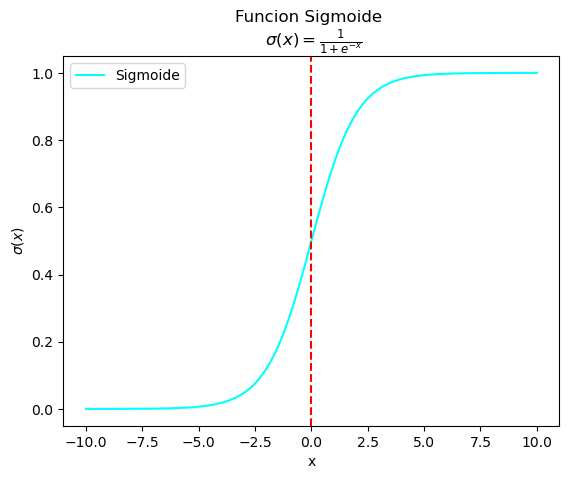

In [17]:
sig = lambda x: 1./(1.+np.exp(-x))
x = np.linspace(-10, 10, 100)
plt.plot(x, sig(x), label='Sigmoide', color='cyan')
plt.title('Funcion Sigmoide \n $\sigma (x) = \\frac{1}{1+e^{-x}}$')
plt.xlabel('x')
plt.ylabel('$\sigma (x)$')
plt.legend()

# Ahora dibujamos una linea roja en x=0
plt.axvline(x=0, color='red', linestyle='--')
plt.show()